In [ ]:
# Mengambil dataset catur

In [1]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pengembangan_academy/Chessman-image-dataset.zip \
  -O /tmp/Chessman-image-dataset.zip

--2020-08-05 10:28:01--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M  11.9MB/s    in 7.6s    

2020-08-05 10:28:10 (7.59 MB/s) - ‘/tmp/Chessman-image-dataset.zip’ saved [60684125/60684125]



In [4]:
# Mengekstrak dataset
import os, zipfile
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
# Melihat direktori pada dataset
os.listdir('/tmp/Chessman-image-dataset/Chess')

['Knight', 'Queen', 'Pawn', 'Bishop', 'King', 'Rook']

In [7]:
# melihat berapa banyak gambar di setiap direktori
print('Total Knight image : ',len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))
print('Total Queen image : ',len(os.listdir('/tmp/Chessman-image-dataset/Chess/Queen')))
print('Total Pawn image : ',len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('Total Bishop image : ',len(os.listdir('/tmp/Chessman-image-dataset/Chess/Bishop')))
print('Total King image : ',len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('Total Rook image : ',len(os.listdir('/tmp/Chessman-image-dataset/Chess/Rook')))

Total Knight image :  106
Total Queen image :  78
Total Pawn image :  107
Total Bishop image :  87
Total King image :  76
Total Rook image :  102


In [19]:
# Mengimport library yang dibutuhkan
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten

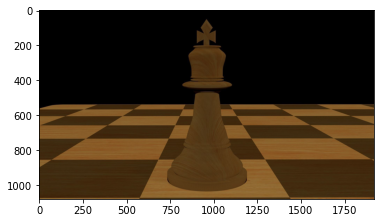

In [12]:
# Melihat contoh dari sebuah gambar pada dataset
%matplotlib inline
img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
imgplot = plt.imshow(img)

In [15]:
# Membagi dataset menjadi data training dan data testing
train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    zoom_range = 0.2,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.1
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 8,
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 16,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [20]:
# Membuat arsitektur model neural network
model = Sequential([
        # Convolutional Layer
        Conv2D(64, (3,3), activation = 'relu', input_shape = (150,150,3)),
        MaxPooling2D(2,2),
        Conv2D(32, (3,3), activation = 'relu'),
        MaxPooling2D(2,2),
        Dropout(0.4),
        Conv2D(64, (3,3), activation = 'relu'),
        MaxPooling2D(2,2),
        Dropout(0.4),
        # Mengubah matriks menjadi array 1 dimensi
        Flatten(),
        # Hidden Layer
        Dense(512, activation = 'relu'),
        Dense(256, activation = 'relu'),
        # Output
        Dense(6, activation = 'softmax')
])

In [21]:
# Menambah optimizer dan loss supaya model belajar dengan baik
model.compile(
    optimizer = 'Adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
# Pelatihan Model neural network
history = model.fit(
    train_generator,
    validation_data = validation_generator,
    epochs = 50,
    verbose = 2
)

Epoch 1/50
63/63 - 33s - loss: 1.8739 - accuracy: 0.1643 - val_loss: 1.7835 - val_accuracy: 0.1923
Epoch 2/50
63/63 - 32s - loss: 1.7886 - accuracy: 0.1723 - val_loss: 1.7847 - val_accuracy: 0.1923
Epoch 3/50
63/63 - 32s - loss: 1.7860 - accuracy: 0.1663 - val_loss: 1.7797 - val_accuracy: 0.1923
Epoch 4/50
63/63 - 32s - loss: 1.7839 - accuracy: 0.1924 - val_loss: 1.7786 - val_accuracy: 0.1923
Epoch 5/50
63/63 - 32s - loss: 1.7857 - accuracy: 0.1743 - val_loss: 1.7752 - val_accuracy: 0.1923
Epoch 6/50
63/63 - 32s - loss: 1.7774 - accuracy: 0.2124 - val_loss: 1.7828 - val_accuracy: 0.1923
Epoch 7/50
63/63 - 32s - loss: 1.7723 - accuracy: 0.1924 - val_loss: 1.7928 - val_accuracy: 0.1923
Epoch 8/50
63/63 - 32s - loss: 1.7735 - accuracy: 0.2164 - val_loss: 1.7664 - val_accuracy: 0.2692
Epoch 9/50
63/63 - 32s - loss: 1.7242 - accuracy: 0.2645 - val_loss: 1.7515 - val_accuracy: 0.2115
Epoch 10/50
63/63 - 32s - loss: 1.7112 - accuracy: 0.2425 - val_loss: 1.6913 - val_accuracy: 0.2500
Epoch 11/